In [1]:
# TODO figure out how to share conda environments
# (on Lana's account, its named envAMOC-CMIP6)
import numpy as np
import json
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt

# Open Matthew's data
using JSON instead of pickle as there occured some error with the latter one...

To remember from the README:
**The AMOC arrays are masked-arrays, with missing models/ensemble-members/years masked. When manipulating them, always ensure to use masked array-compatible operations**

In [2]:
with open('matthew/JSON_data/Figure_AR6_CMIP5-6_AMOC_35N_1000m.json', 'r') as handle:
    json_load = json.load(handle)

amoc_c5_ts = np.ma.asarray(json_load["amoc_c5_ts"])  # Note the use of numpy masked arrays (np.ma)
amoc_c6_ts = np.ma.asarray(json_load["amoc_c6_ts"])
cmip5_models = json_load["cmip5_models"]
cmip6_models = json_load["cmip6_models"]
year = np.asarray(json_load["year"])

## Create xarray dataframe

In [3]:
''' 
Regarding the coordinates in the CMIP6 data Matthew provides, I do not yet understand what exactly 
these ensemble members are and what the different f's mean, from the README:

Ensemble members:
These are the first 10 ensemble members r${ens_num}i1p1f1 in the respective experiments. 
Where "f1" was not available we have used "f2" or "f3" and so on.
'''

""" From the documentation website https://es-doc.org/cmip6-ensembles-simulations/:
A small amount  of manual input will be required to describe how the simulations vary across the four 
“ensemble axes”, i.e. the realization (r), initialization (i), perturbation (p) and forcing (f) axes of the 
ensemble. If the ensemble does not vary along one of these axes then no action is necessary. This extra 
information will be collected either via spreadsheet or in an iPython notebook.
"""

amoc6 = xr.DataArray(
    amoc_c6_ts,
    dims = ('models', 'experiments', 'ensemble-members', 'latitudes', 'time'),
    coords = dict(
        models      = cmip6_models,
        experiments = ['ssp119', 'ssp126', 'ssp245', 'ssp370', 'ssp585'],
        latitudes   = ['26.5N', '35N'],
        time        = year
        )
    )
amoc6

<xarray.DataArray (models: 34, experiments: 5, ensemble-members: 10, latitudes: 2, time: 251)>
array([[[[[None, None, None, ..., None, None, None],
          [None, None, None, ..., None, None, None]],

         [[None, None, None, ..., None, None, None],
          [None, None, None, ..., None, None, None]],

         [[None, None, None, ..., None, None, None],
          [None, None, None, ..., None, None, None]],

         ...,

         [[None, None, None, ..., None, None, None],
          [None, None, None, ..., None, None, None]],

         [[None, None, None, ..., None, None, None],
          [None, None, None, ..., None, None, None]],

         [[None, None, None, ..., None, None, None],
          [None, None, None, ..., None, None, None]]],

...
           ..., None, None, None],
          [26.69435582425223, 24.721422683364782, 25.223194906539764,
           ..., None, None, None]],

         [[None, None, None, ..., None, None, None],
          [None, None, None, ..., None, None, None]],

         [[None, None, None, ..., None, None, None],
          [None, None, None, ..., None, None, None]],

         ...,

         [[None, None, None, ..., None, None, None],
          [None, None, None, ..., None, None, None]],

         [[None, None, None, ..., None, None, None],
          [None, None, None, ..., None, None, None]],

         [[None, None, None, ..., None, None, None],
          [None, None, None, ..., None, None, None]]]]], dtype=object)
Coordinates:
  * models       (models) <U15 'AWI-CM-1-1-MR' 'BCC-CSM2-MR' ... 'SAM0-UNICON'
  * experiments  (experiments) <U6 'ssp119' 'ssp126' 'ssp245' 'ssp370' 'ssp585'
  * latitudes    (latitudes) <U5 '26.5N' '35N'
  * time         (time) int64 1850 1851 1852 1853 1854 ... 2097 2098 2099 2100
Dimensions without coordinates: ensemble-members

limit_output extension: Maximum message size of 10000 exceeded with 17132 characters

/home/mayayami/anaconda3/lib/python3.8/site-packages/xarray/core/nanops.py:133: RuntimeWarning: invalid value encountered in true_divide
  data = data / (valid_count - ddof)
/home/mayayami/anaconda3/lib/python3.8/site-packages/xarray/core/nanops.py:133: RuntimeWarning: invalid value encountered in true_divide
  data = data / (valid_count - ddof)
/home/mayayami/anaconda3/lib/python3.8/site-packages/xarray/core/nanops.py:133: RuntimeWarning: invalid value encountered in true_divide
  data = data / (valid_count - ddof)
/home/mayayami/anaconda3/lib/python3.8/site-packages/xarray/core/nanops.py:133: RuntimeWarning: invalid value encountered in true_divide
  data = data / (valid_count - ddof)
/home/mayayami/anaconda3/lib/python3.8/site-packages/xarray/core/nanops.py:133: RuntimeWarning: invalid value encountered in true_divide
  data = data / (valid_count - ddof)


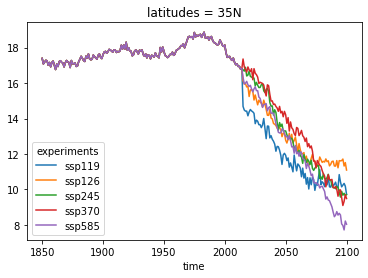

In [4]:
amoc6.sel(latitudes='35N').groupby('experiments').mean(dim = 'ensemble-members').mean(dim = 'models').plot.line(x='time',hue='experiments')